In [2]:
from bs4 import BeautifulSoup
import requests

<h1><b>Normal Web scraping</b></h1>

In [201]:
url = 'https://www.set.or.th/th/home'
page = requests.get(url) #get access to set website
soup = BeautifulSoup(page.content, 'html.parser') #parse the html content to str

In [4]:
html_SET = soup.find_all('table')[1] #find table tag in html

In [5]:
import pandas as pd
import numpy as np

In [6]:
SET = pd.read_html(str(html_SET))[0]
SET

,ดัชนี,ล่าสุด,เปลี่ยนแปลง,ปริมาณ ('000 หุ้น)1,มูลค่า (ลบ.)1
0,SET,1188.41,-15.31,8986941,45046.70
1,SET50,755.38,-11.32,1686418,33958.23
2,SET50FF,755.62,-8.25,1686418,33958.23
3,SET100,1636.52,-23.46,2450312,39414.88
4,SET100FF,1641.57,-17.13,2450312,39414.88
5,sSET,626.44,-7.58,393222,1509.38
6,SETCLMV,620.25,-5.76,796621,22588.36
7,SETHD,1091.80,-4.78,955952,15884.90
8,SETESG,752.89,-7.47,2071913,36215.41
9,SETWB,689.94,-12.99,435156,8776.45


In [7]:
html_top5sell = soup.find_all('div', class_='row list-card-stock px-1')[0] #find div tag in html which has class name 'row list-card-stock px-1'

In [ ]:
#find all the card in the top5sell and store in the list
top5sell = []
for card in html_top5sell:

    name = card.find('div', class_='symbol').text.strip()

    price = card.find('h3', class_='quote-last').text.strip()

    change_rate = card.find('div', class_='percent').text.strip()

    top5sell.append({'Name': name, 'Price': price, 'Change Rate': change_rate})

top5sell
top5sell = pd.DataFrame(top5sell)
top5sell

,Name,Price,Change Rate
0,DELTA,71.25,-6.00 (-7.77%)
1,ADVANC,271.00,-5.00 (-1.81%)
2,BBL,148.50,-3.00 (-1.98%)
3,CPALL,52.50,-1.50 (-2.78%)
4,KBANK,152.50,+1.00 (+0.66%)


<h1><b>Compare</b></h1>

In [202]:
url = 'https://www.set.or.th/th/market/product/stock/quote/'

In [203]:
company1 = 'KTB'
company2 = 'PTT'
stock1 = url + company1 + '/price' #price now page for set web url
stock2 = url + company2 + '/price'

In [11]:
page1 = requests.get(stock1)
soup = BeautifulSoup(page1.content, 'html.parser')
html_stock1 = soup.find_all('div', class_='cost-detail')[0]
page2 = requests.get(stock2)
soup2 = BeautifulSoup(page2.content, 'html.parser')
html_stock2 = soup2.find_all('div', class_='cost-detail')[0]

In [12]:
details_now = []

for detail in html_stock1.find_all('div', class_='item-list-details'): #see now details of the stock and append to list
    label = detail.find('label').text.strip()
    value = detail.find('span').text.strip()
    details_now.append({label: value})

#####

details2_now = []

for detail in html_stock2.find_all('div', class_='item-list-details'):
    label = detail.find('label').text.strip()
    value = detail.find('span').text.strip()
    details2_now.append({label: value})

In [ ]:
print(company1)
details_now

KTB


[{'ล่าสุด': '23.00'},
 {'เปลี่ยนแปลง': '+0.50\n                  (+2.22%)'},
 {'สูงสุด': '23.10'},
 {'ต่ำสุด': '22.40'},
 {'ราคาปิดก่อนหน้า': '22.50'},
 {'ราคาเปิด': '22.50'},
 {'ปริมาณ (หุ้น)': '67,664,388'},
 {"มูลค่า ('000 บาท)": '1,542,211.93'},
 {'ราคาเฉลี่ย**': '22.79'},
 {'ราคาพาร์': '5.15'},
 {'ราคา Floor': '15.80'},
 {'ราคา Ceiling': '29.25'}]

In [14]:
print(company2)
details2_now

PTT


[{'ล่าสุด': '31.00'},
 {'เปลี่ยนแปลง': '-0.50\n                  (-1.59%)'},
 {'สูงสุด': '31.75'},
 {'ต่ำสุด': '31.00'},
 {'ราคาปิดก่อนหน้า': '31.50'},
 {'ราคาเปิด': '31.75'},
 {'ปริมาณ (หุ้น)': '43,431,067'},
 {"มูลค่า ('000 บาท)": '1,364,594.17'},
 {'ราคาเฉลี่ย**': '31.42'},
 {'ราคาพาร์': '1.00'},
 {'ราคา Floor': '22.10'},
 {'ราคา Ceiling': '40.75'}]

In [ ]:
stock1 = url + company1 + '/historical-trading' #historical trading page for set web url
stock2 = url + company2 + '/historical-trading'
print(stock1 + '\n' + stock2)

https://www.set.or.th/th/market/product/stock/quote/KTB/historical-trading
https://www.set.or.th/th/market/product/stock/quote/PTT/historical-trading


In [16]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time

In [17]:
driver = webdriver.Chrome(options=Options().add_argument('--headless')) #open the browser in headless mode
driver.get(stock1) #get access to the stock1 url
time.sleep(5) #wait for 5 seconds
html_stock1 = driver.page_source #get the html content of the page
driver.quit()  #close the browser
soup = BeautifulSoup(html_stock1, "html.parser") #parse the html content to str

driver = webdriver.Chrome(options=Options().add_argument('--headless'))
driver.get(stock2)
time.sleep(5)
html_stock2 = driver.page_source
driver.quit()
soup2 = BeautifulSoup(html_stock2, "html.parser")

In [18]:
html_stock1 = soup.find_all('table')[1] #find table tag in html which is the second table of the page
html_stock2 = soup2.find_all('table')[1]

In [19]:
def get_data(html_stock): #get the data from the html content
    columns = {
        "date": "1",
        "open": "2",
        "highest": "3",
        "lowest": "4",
        "close": "5",
        "change": "6",
        "change_percent": "7",
        "quantity": "8",
        "value": "9"
    }

    data = {
        key: [td.get_text(strip=True) for td in html_stock.find_all("td", {"aria-colindex": col, "role": "cell"})] #get the text of the td tag
        for key, col in columns.items()
    }

    return data

def translate_date(date_list): #translate the thai month to english month cuz the set website use thai month but pandas use english month to sorted
    month_map = {
        'ม.ค.': 'JAN', 'ก.พ.': 'FEB', 'มี.ค.': 'MAR', 'เม.ย.': 'APR',
        'พ.ค.': 'MAY', 'มิ.ย.': 'JUN', 'ก.ค.': 'JUL', 'ส.ค.': 'AUG',
        'ก.ย.': 'SEP', 'ต.ค.': 'OCT', 'พ.ย.': 'NOV', 'ธ.ค.': 'DEC'
    }
    
    return [i.replace(thai, eng) for i in date_list for thai, eng in month_map.items() if thai in i]

In [205]:
#pd.read_html(str(html_stock1))[0]

In [206]:
#pd.read_html(str(html_stock2))[0]

In [149]:
data1 = get_data(html_stock1)
data2 = get_data(html_stock2)

In [23]:
data1 = {
    key: pd.to_numeric([v.replace(',', '') for v in value], errors='coerce') if key != 'date' else value #replace the comma in the number and convert to numeric
    for key, value in data1.items()
}
data2 = {
    key: pd.to_numeric([v.replace(',', '') for v in value], errors='coerce') if key != 'date' else value
    for key, value in data2.items()
}

In [24]:
date1 = data1['date'] #keep thai date in another variable
date2 = data2['date']

data1['date'] = translate_date(data1['date']) #then translate the thai date to english date
data2['date'] = translate_date(data2['date'])

In [25]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

df1['date'] = df1['date'].apply(lambda x: x[:-4] + str(int(x[-4:]) - 543)) #convert the thai year to gregorian year
df1['date'] = pd.to_datetime(df1['date'], format='%d %b %Y', dayfirst=True) #convert the date to datetime format
df2['date'] = df2['date'].apply(lambda x: x[:-4] + str(int(x[-4:]) - 543))
df2['date'] = pd.to_datetime(df2['date'], format='%d %b %Y', dayfirst=True)

In [26]:
df1

,date,open,highest,lowest,close,change,change_percent,quantity,value
0,2025-02-28,22.8,22.9,22.1,22.5,-0.4,-1.75,100249322,2240071.82
1,2025-02-27,22.8,23.2,22.6,22.9,0.1,0.44,33656235,772843.36
2,2025-02-26,23.1,23.6,22.5,22.8,-0.3,-1.30,97830868,2249590.68
3,2025-02-25,23.4,23.6,23.0,23.1,-0.5,-2.12,60108247,1399017.57
4,2025-02-24,23.8,24.0,23.3,23.6,-0.4,-1.67,85651110,2021621.58
5,2025-02-21,24.5,24.6,23.8,24.0,-0.4,-1.64,96442470,2324659.01
6,2025-02-20,24.5,24.7,24.1,24.4,0.4,1.67,119987434,2930274.30
7,2025-02-19,23.8,24.1,23.5,24.0,0.2,0.84,68243215,1627269.38
8,2025-02-18,23.3,23.8,23.2,23.8,0.7,3.03,46430265,1095129.58
9,2025-02-17,23.1,23.3,22.9,23.1,0.3,1.32,38595326,891901.85


In [27]:
df2

,date,open,highest,lowest,close,change,change_percent,quantity,value
0,2025-02-28,31.50,32.00,31.00,31.50,-0.25,-0.79,79253587,2496836.69
1,2025-02-27,32.00,32.50,31.75,31.75,-0.25,-0.78,34555147,1106926.84
2,2025-02-26,32.25,32.50,32.00,32.00,-0.25,-0.78,42323806,1361717.40
3,2025-02-25,32.50,32.75,32.25,32.25,0.00,0.00,56830600,1845564.86
4,2025-02-24,32.25,32.50,32.00,32.25,0.00,0.00,35363725,1141505.65
5,2025-02-21,31.75,32.25,31.50,32.25,0.75,2.38,53334446,1708319.98
6,2025-02-20,31.25,31.75,31.00,31.50,0.00,0.00,43467014,1363687.67
7,2025-02-19,31.50,32.00,31.25,31.50,0.00,0.00,40628311,1282537.63
8,2025-02-18,31.00,31.50,30.75,31.50,0.25,0.80,39604775,1237075.84
9,2025-02-17,31.50,31.50,31.00,31.25,0.25,0.81,47156545,1474851.75


In [28]:
open_mean1 = np.mean([i for i in df1['open']]) #find mean
open_mean2 = np.mean([i for i in df2['open']]) 
open_std1 = np.std([i for i in df1['open']]) #find standard deviation
open_std2 = np.std([i for i in df2['open']])
print(company1,'\nmean:', open_mean1,'\nstandard deviation:', round(open_std1, 2), '\n', company2,'\nmean:', open_mean2,'\nstandard deviation:', round(open_std2, 2))

KTB 
mean: 23.46 
standard deviation: 0.49 
 PTT 
mean: 31.15 
standard deviation: 0.73


In [29]:
import matplotlib.pyplot as plt

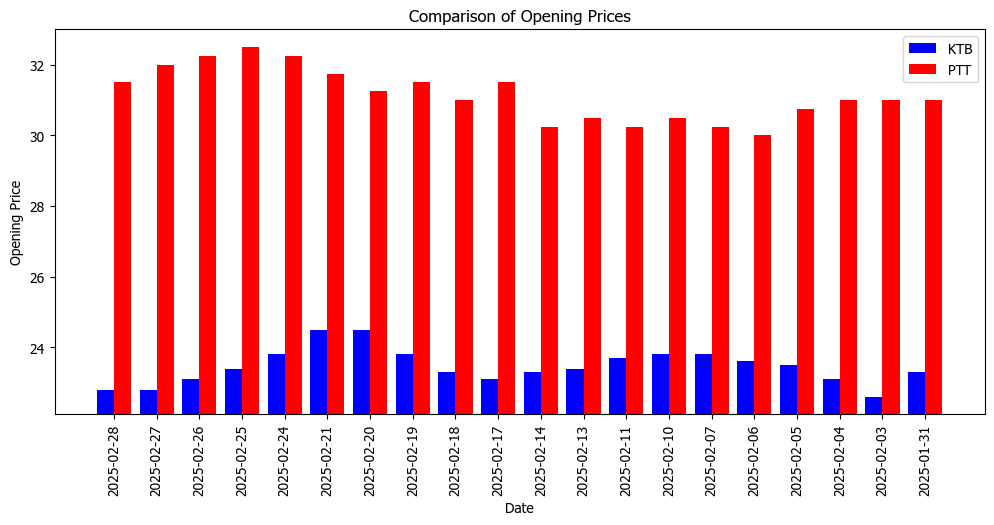

In [30]:
plt.rcParams['font.family'] = 'Tahoma'  # Set font
plt.figure(figsize=(12, 5))  # Set figure size

bar_width = 0.4
unique_dates = df1['date'].astype(str).tolist()
x_indexes = np.arange(len(unique_dates))  # Convert dates to index positions

# Plot grouped bars (shift each bar left and right)
plt.bar(x_indexes - bar_width/2, df1['open'], width=bar_width, color='blue', label=company1)
plt.bar(x_indexes + bar_width/2, df2['open'], width=bar_width, color='red', label=company2)

# X-axis settings
plt.xticks(ticks=x_indexes, labels=unique_dates, rotation=90)

# Y-axis limits
min_y = min(df1['open'].min(), df2['open'].min()) - 0.5
max_y = max(df1['open'].max(), df2['open'].max()) + 0.5
plt.ylim(min_y, max_y)

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Opening Price")
plt.title("Comparison of Opening Prices")
plt.legend()

# Show plot
plt.show()

<h1><b>Prediction</b</h1>

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [32]:
Company = 'TISCO'

In [162]:
raw_url = 'https://www.set.or.th/en/market/product/stock/quote/'
url = raw_url + Company + '/price'
url

'https://www.set.or.th/en/market/product/stock/quote/TISCO/price'

In [163]:
driver = webdriver.Chrome(options=Options().add_argument('--headless'))
driver.get(url)
time.sleep(5)
html = driver.page_source
driver.quit()
soup = BeautifulSoup(html, "html.parser")

In [164]:
table = soup.find('div', class_='price-important-stock-left')
# print(table.prettify())

In [ ]:
highlight_html = table.find_all('div', class_='item-list-details')
highlight = []
for item in highlight_html:
    label_element = item.find('label')
    span_element = item.find('span')

    if label_element and span_element:
        label = label_element.text.strip()
        value = span_element.text.strip()
        highlight.append({label: value})

df_highlight = pd.DataFrame(highlight).ffill().dropna() #.iloc[0]
df_highlight

,Market Cap. (M.Baht),Price Performance (%)*,P/E,Dividend Yield (%),P/BV,Dividend (Baht/Shares),Beta*,XD Date,% Free Float
8,"78,663.43",-0.25,11.40,7.89,1.83,2.00,0.30,10 Sep 2024,81.31


In [168]:
url = raw_url + Company + '/historical-trading'

In [74]:
driver = webdriver.Chrome(options=Options().add_argument('--headless'))
driver.get(url)
html = []

try:
    current_page = 1  # Assuming we start from page 1
    total_pages = 7    # Adjust this based on your total pages

    while current_page <= total_pages:
            # Wait for the next page button to be clickable
            next_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, f"//button[@role='menuitemradio' and @aria-label='Go to page {current_page}']"))
            )
            next_button.click()
            time.sleep(5)  # Allow page to load (Adjust based on website speed)
            current_page += 1
            html.append(driver.page_source)

finally:
    driver.quit()


In [142]:
soup = BeautifulSoup(html[0], "html.parser")
aaa = soup.find_all('table')[1]

In [143]:
html_table = []
for i in html:
    soup = BeautifulSoup(i, "html.parser")
    _html_table = soup.find_all('table')[1]
    df = pd.read_html(str(_html_table))[0]
    html_table.append(df)

In [192]:
df = pd.concat(html_table, ignore_index=True)
df.columns = df.columns.str.replace(r"\s*\(Click to sort Ascending\)", "", regex=True)
df

,Date,Open,High,Low,Close,Change,% Change,Volume (Shares),Value ('000 Baht)
0,28 Feb 2025,98.50,98.75,98.00,98.25,-0.50,-0.51,6589900,647615.75
1,27 Feb 2025,98.75,99.00,98.50,98.75,0.00,0.00,3478075,343785.96
2,26 Feb 2025,98.75,99.50,98.50,98.75,0.25,0.25,5241104,518553.53
3,25 Feb 2025,99.50,99.75,98.50,98.50,-1.00,-1.01,3277389,324306.22
4,24 Feb 2025,99.50,100.00,99.25,99.50,0.00,0.00,3237445,322629.49
...,...,...,...,...,...,...,...,...,...
120,04 Sep 2024,95.50,95.75,95.25,95.50,-0.25,-0.26,5311392,501892.04
121,03 Sep 2024,95.50,96.00,95.00,95.75,0.50,0.52,4650063,444826.75
122,02 Sep 2024,95.25,95.75,95.00,95.25,-0.25,-0.26,3962463,377953.75
123,30 Aug 2024,94.75,95.50,94.50,95.50,0.75,0.79,4940062,469151.61


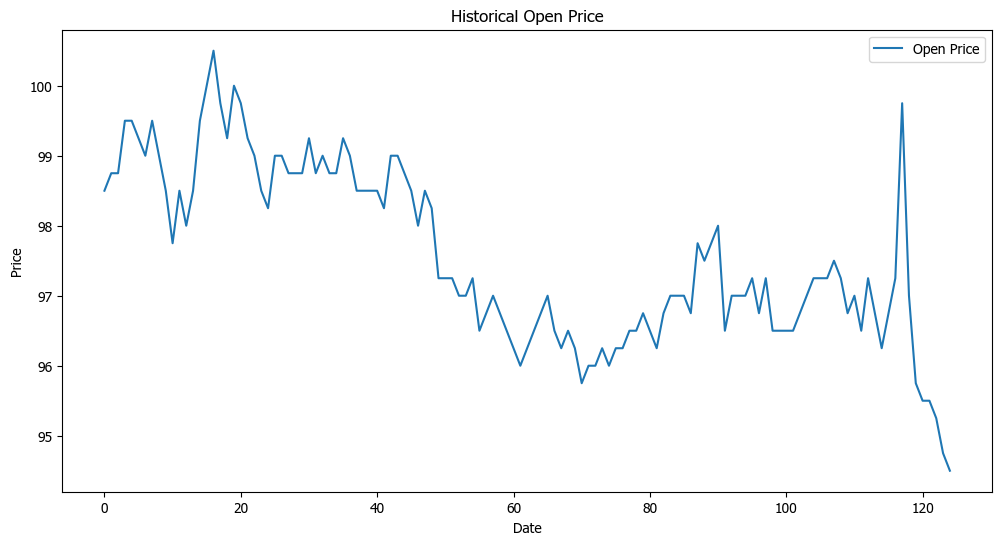

In [193]:
data = 'Open'
plt.figure(figsize=(12,6))
plt.plot(df.index, df[data], label=f"{data} Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"Historical {data} Price")
plt.legend()
plt.show()

In [182]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

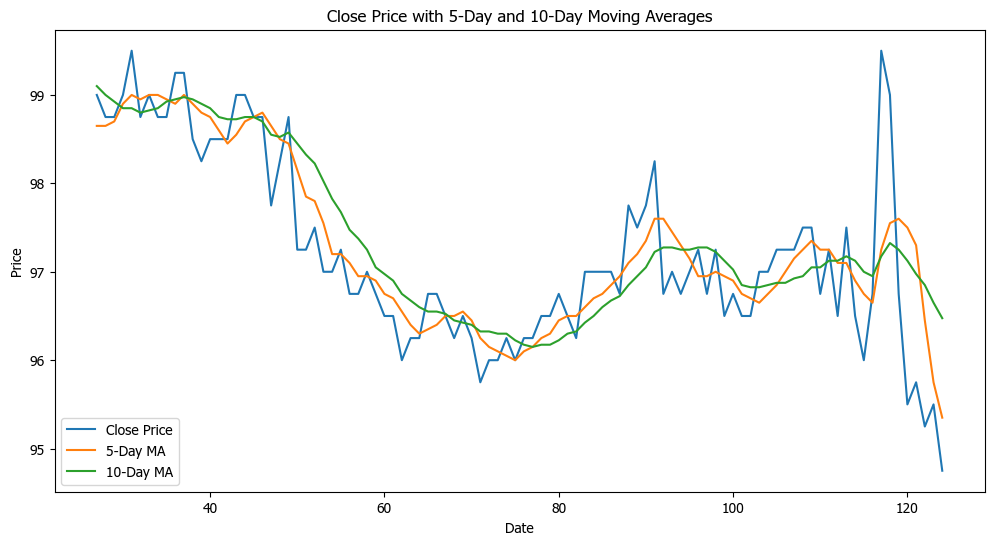

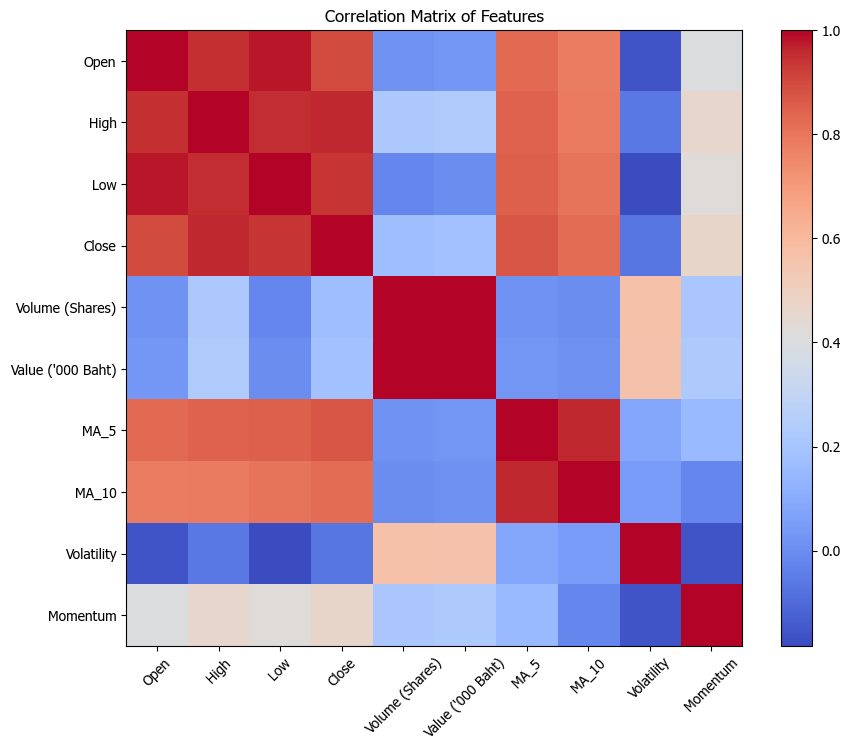

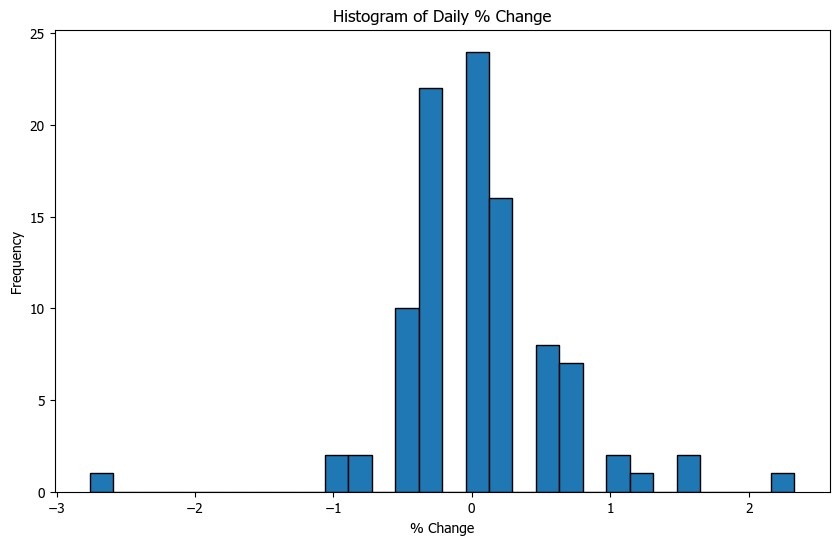

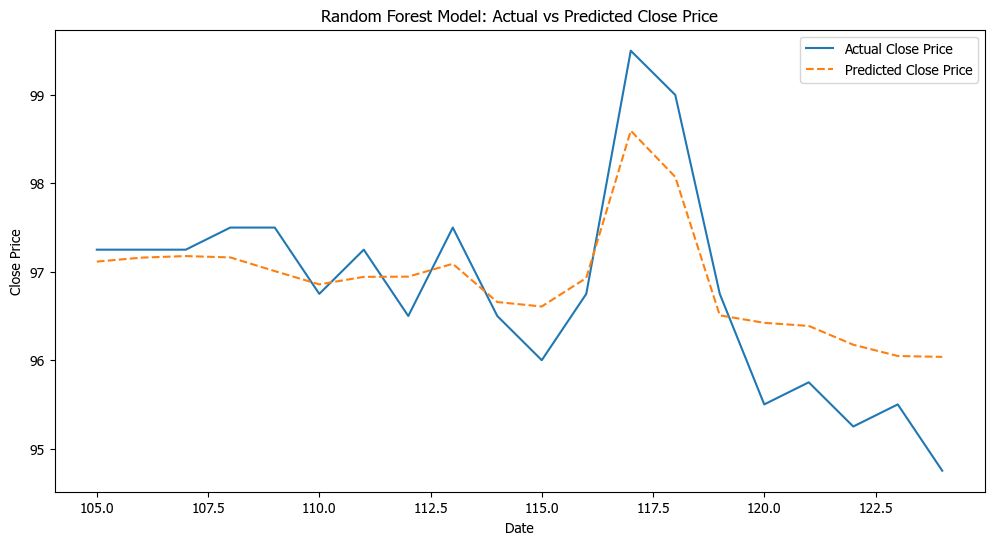

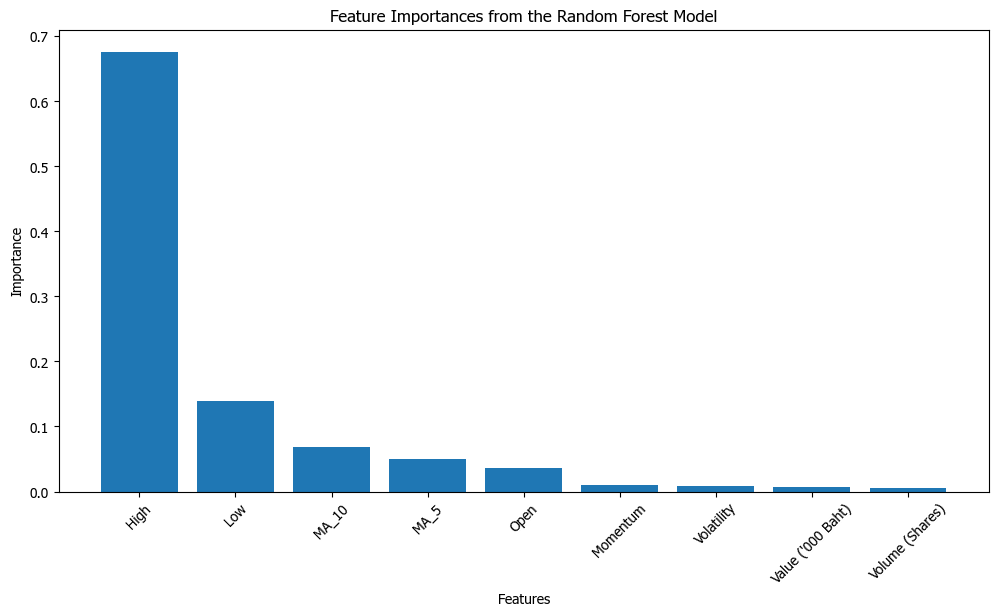

In [ ]:
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['Volatility'] = df['Close'].rolling(window=5).std()
df['Momentum'] = df['Close'] - df['Close'].shift(5)
df = df.dropna()

# Plot Close Price with 5-Day and 10-Day Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Close Price")
plt.plot(df.index, df["MA_5"], label="5-Day MA")
plt.plot(df.index, df["MA_10"], label="10-Day MA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Close Price with 5-Day and 10-Day Moving Averages")
plt.legend()
plt.show()


# Correlation Matrix of Selected Features
features_for_corr = ["Open", "High", "Low", "Close", 
                       "Volume (Shares)", "Value ('000 Baht)", 
                       "MA_5", "MA_10", "Volatility", "Momentum"]
corr_matrix = df[features_for_corr].corr()

# Plot Correlation Matrix of Features
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Matrix of Features")
plt.show()

# Plot Histogram of Daily % Change
plt.figure(figsize=(10, 6))
plt.hist(df["% Change"], bins=30, edgecolor='black')
plt.xlabel("% Change")
plt.ylabel("Frequency")
plt.title("Histogram of Daily % Change")
plt.show()

# Prepare features and target variable
features = ["Open", "High", "Low", "Volume (Shares)", "Value ('000 Baht)",
            "MA_5", "MA_10", "Volatility", "Momentum"]
target = "Close"
X = df[features]
y = df[target]

# Time Series Cross-Validation with Random Forest
tscv = TimeSeriesSplit(n_splits=5)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation scores (MSE and R2)
mse_scores = -cross_val_score(rf_model, X, y, cv=tscv, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf_model, X, y, cv=tscv, scoring='r2')

# Train-Test Split for Final Evaluation (80% train, 20% test)
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Train the Random Forest model
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate on the test set
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Plotting Actual vs Predicted Close Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Close Price")
plt.plot(y_test.index, y_pred, label="Predicted Close Price", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Random Forest Model: Actual vs Predicted Close Price")
plt.legend()
plt.show()

# Feature Importance Analysis
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot Feature Importances from the Random Forest Model
plt.figure(figsize=(12, 6))
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances from the Random Forest Model")
plt.show()

In [184]:
print("Cross-validated Mean Squared Error:", mse_scores.mean())
print("Cross-validated R2 Score:", r2_scores.mean())
print("Test Mean Squared Error:", mse_test)
print("Test R2 Score:", r2_test)

Cross-validated Mean Squared Error: 0.3801698529411759
Cross-validated R2 Score: -0.3980180624234816
Test Mean Squared Error: 0.32671874999999934
Test R2 Score: 0.7277109341368926
